# Housing Predition Analysis

# Week 1 and 2 

## Done:
* Researched in housing price market, understand the marjor featurers' impact, e.g. Area,Street,year;
* Data collected and cleaned.
* Compared features, e.g.numerical and category.
* Applied EDA(Exploratory Data Analysis) on the updated data, e.g. correlation and normaliztion check.

## To do:
* Model attempts, e.g multi-linear regression, random forest forcast.

### 1. Data Perparation

#### 1.1 Import Data

In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#### 1.2 Data Information

In [2]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [3]:
for df in [train_df, test_df]:

    df['TotalSF'] = (df['TotalBsmtSF']+ df['1stFlrSF'] + df['2ndFlrSF'])
    df['Total_SF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])


    df['Total_Bath'] = (df['FullBath'] + 0.5 * df['HalfBath']+ 
                        df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'])

Data fields description

* SalePrice - the property's sale price in dollars. This is the target variable.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

#### 1.3 Data Type 

In [4]:
# Get the column names for all numerical variables
num_var = []
cate_var = []
for col in  train_df.columns:
    if col in train_df.describe().columns:
        num_var.append(col)
    else: cate_var.append(col)
num_var
print("There are %d numerical features" % len(num_var))
print("There are %d category features" % len(cate_var))

There are 41 numerical features
There are 43 category features


#### 1.4 Target Variable Price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'SalePrice Normality')

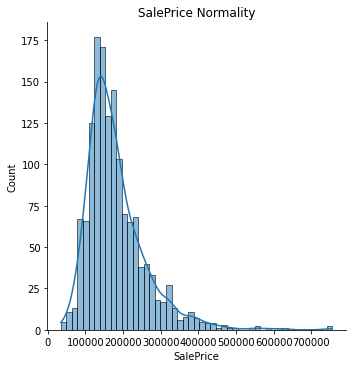

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.displot(train_df['SalePrice'], kde=True)
plt.title("SalePrice Normality")

The SalesPrice is not normlized and left stewed. We need to apply Log-transformation prior to modeling.

#### 1.5 Numerical Variables Analysis

In [6]:
bad_features = []
for col in num_var:
    if train_df[col].mean() < 0.5:
        bad_features.append(col)
print("There are %d features has more than 80%% N/A values" % len(bad_features))


There are 3 features has more than 80% N/A values


In [7]:
for col in num_var:
    train_df[col]= train_df[col].fillna(0)

In [8]:
train_df[num_var].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,Total_SF,Total_Bath
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.000322,0.004191,0.004540
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.082225,-0.006936,0.151048
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,...,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624,0.265165,0.189698,0.083124
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.307234,0.327672,0.204764
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.668155,0.533425,0.541063
OverallCond,0.012609,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.143814,-0.074560,-0.174032
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.347133,0.283450,0.524298
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.342873,0.260606,0.443719
MasVnrArea,-0.051071,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,0.444454,0.406854,0.314248
BsmtFinSF1,-0.005024,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.415843,0.724218,0.481609


<Axes: >

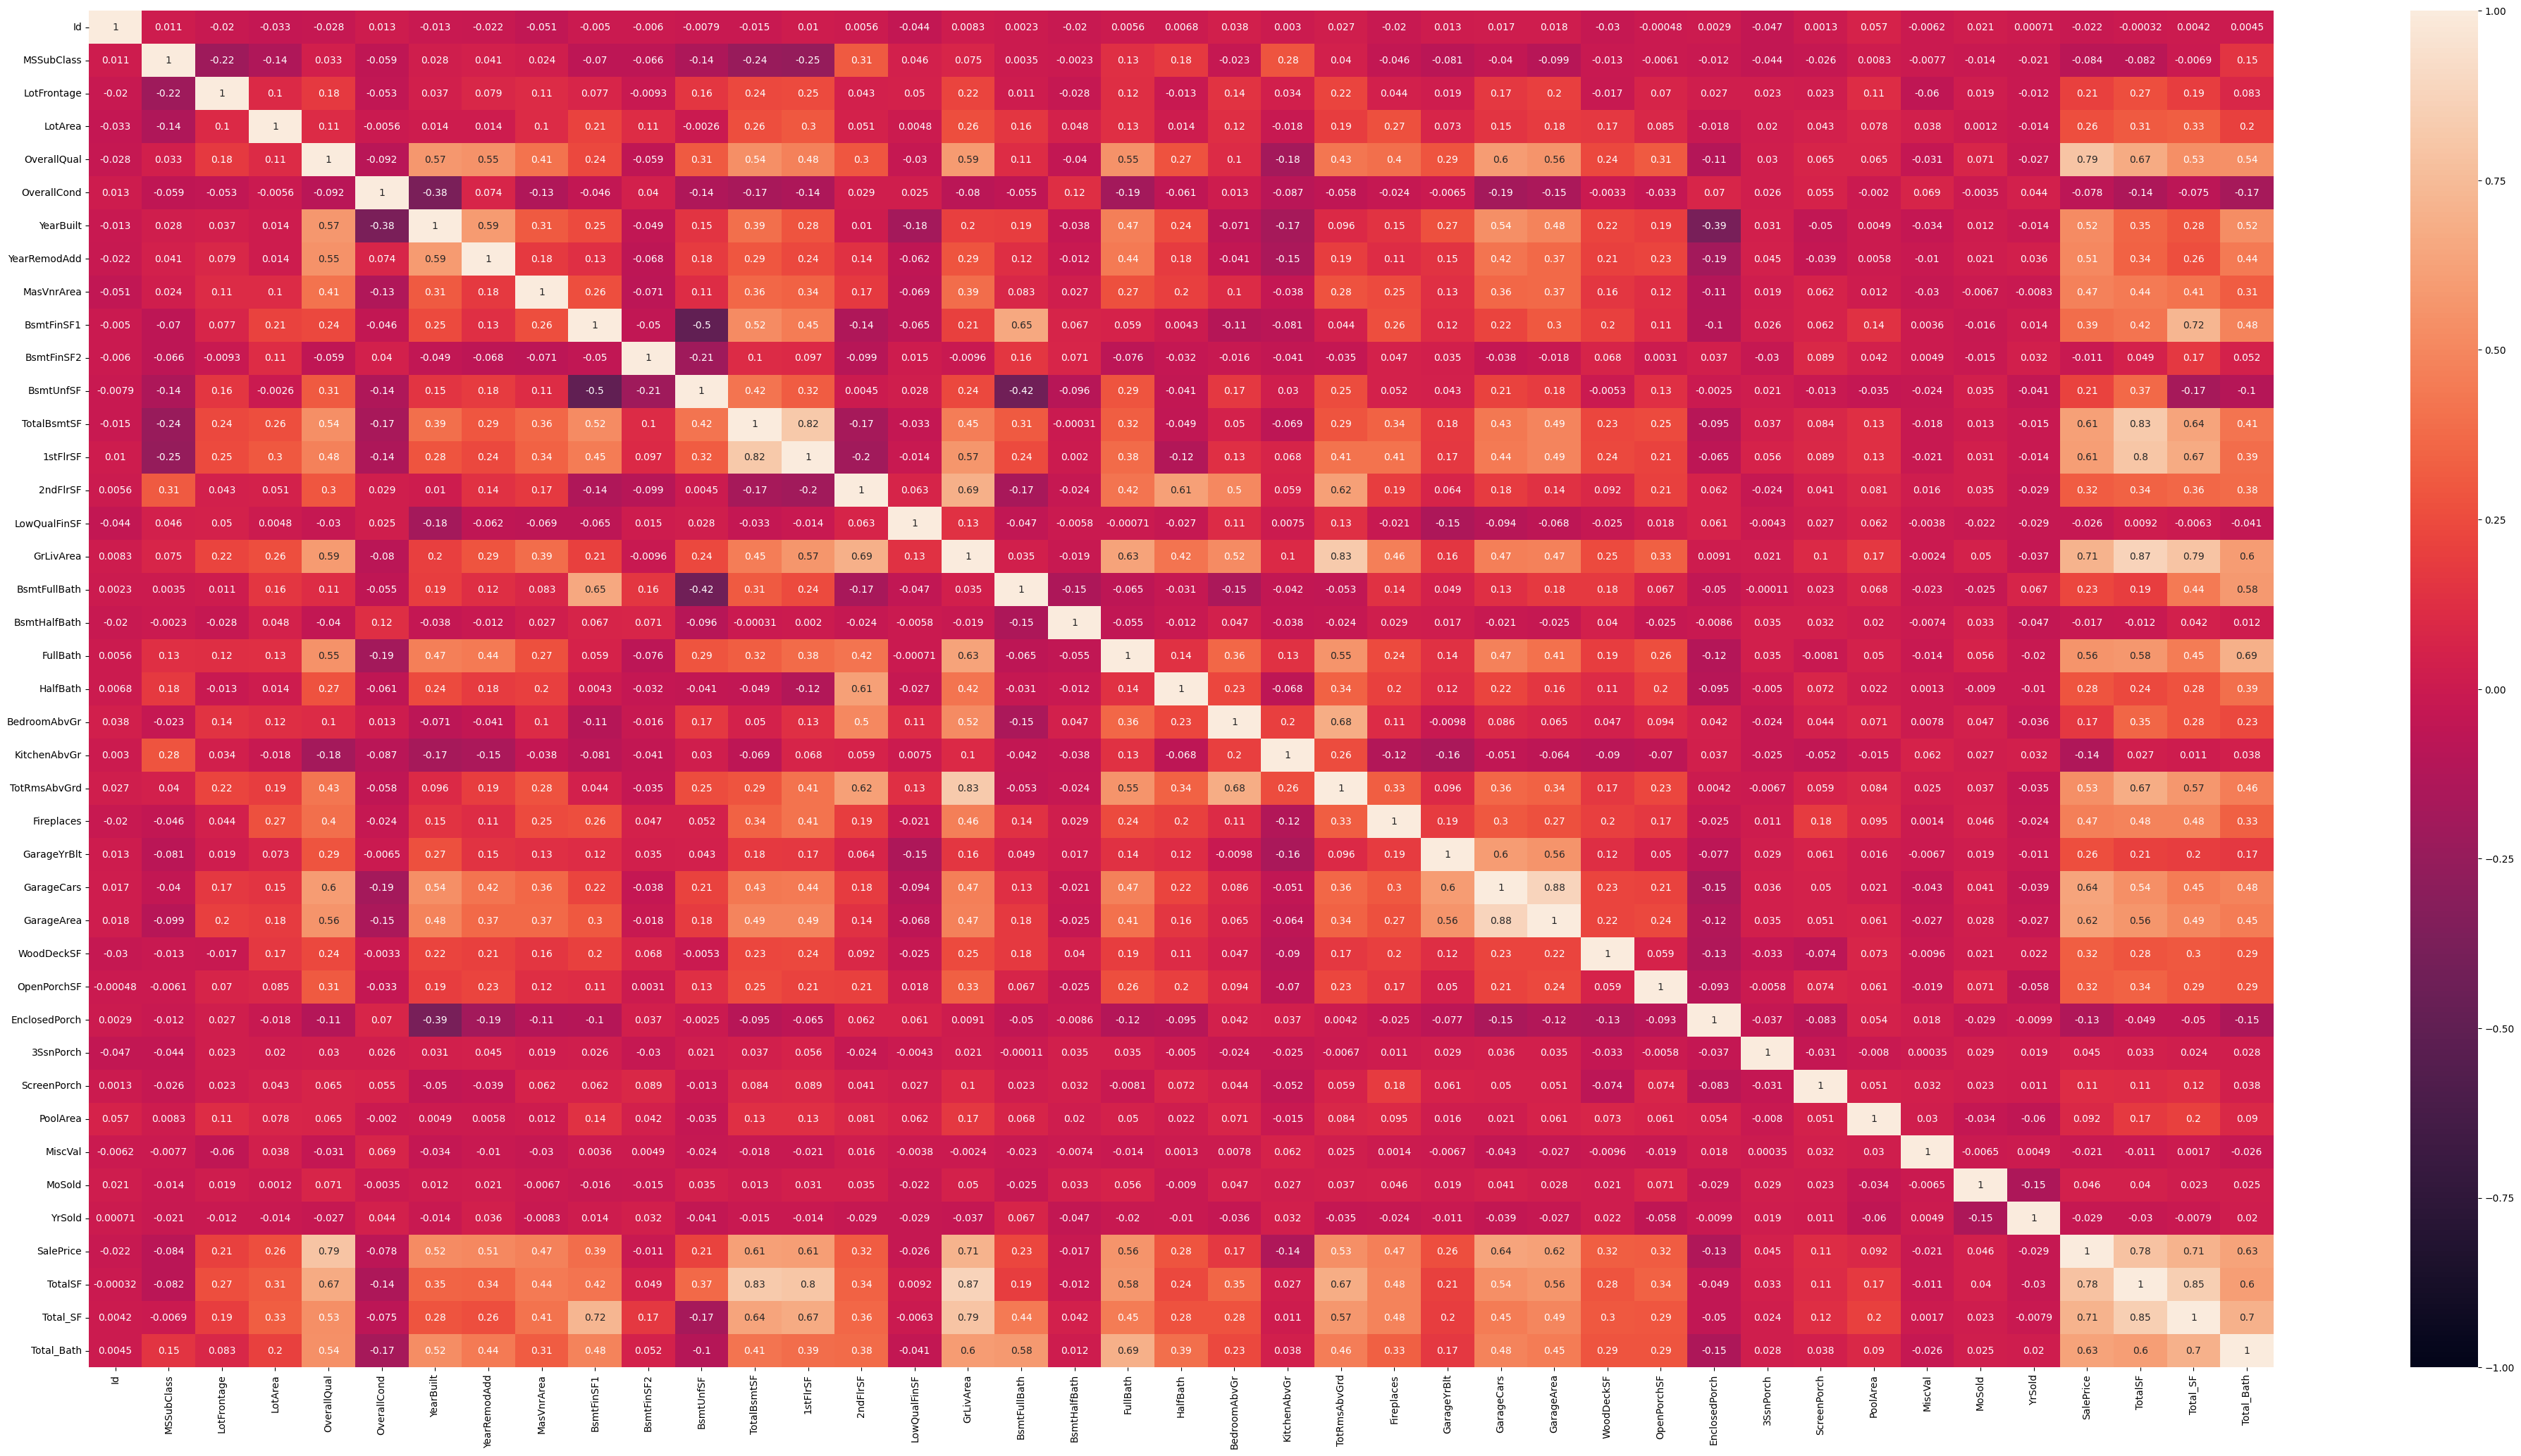

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 25)) # Make the heatmap larger 
sns.heatmap(train_df[num_var].corr(), vmin = -1, vmax = 1, annot = True)

#### 1.6 Conclusion

Targeted varaible SalesPrice will need log-transformation

# Week 3

### 2. Feature Selection

#### 2.1 Numerical Features Selection

In [10]:
corr_df = pd.DataFrame(train_df[num_var].corr())
print("The median correlation of numerical variables to the SalePrice:",np.round(corr_df[["SalePrice"]].median().values,2))
print("The 75% quatile correlation of numerical variables to the SalePrice:",np.round(corr_df[["SalePrice"]].quantile(0.75).values,2))

The median correlation of numerical variables to the SalePrice: [0.28]
The 75% quatile correlation of numerical variables to the SalePrice: [0.56]


Based on the 75% quatile of correlation being 0.52, Numerical features are ranked according to their correlation with SalesPrices. Features with correlations above 0.52 will rank high, while those below or equal to 0.52 will rank low.

In [11]:
high_cor = corr_df[["SalePrice"]].loc[(corr_df.SalePrice > 0.52)]
low_cor = corr_df[["SalePrice"]].loc[(corr_df.SalePrice <= 0.52)]

print("High Correlation Features Number: {}".format(high_cor.shape[0]))
high_cor

High Correlation Features Number: 13


,SalePrice
OverallQual,0.790982
YearBuilt,0.522897
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
FullBath,0.560664
TotRmsAbvGrd,0.533723
GarageCars,0.640409
GarageArea,0.623431
SalePrice,1.000000


In [12]:
high_cor_var = []
low_cor_var = [] 

for var, val in high_cor.iterrows():
    high_cor_var.append(var)
    
for var2, val2 in low_cor.iterrows(): # Also get the feature name of the values with no correlation.
    low_cor_var.append(var2)

print("Variables with high correlations:",high_cor_var)

Variables with high correlations: ['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'TotalSF', 'Total_SF', 'Total_Bath']


In [13]:
high_cor_var_df = train_df[high_cor_var]

#### 2.1.2 Log Transformation

In [14]:
for col in high_cor_var:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_df[col].kurt()) ,
          '   '
          ,'N/A Percnetage: {:02.0f}'.format(train_df[col].isna().mean() * 100)
         )

OverallQual     Skewness: 00.22     Kurtosis: 000.10     N/A Percnetage: 00
YearBuilt       Skewness: -0.61     Kurtosis: -00.44     N/A Percnetage: 00
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25     N/A Percnetage: 00
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75     N/A Percnetage: 00
GrLivArea       Skewness: 01.37     Kurtosis: 004.90     N/A Percnetage: 00
FullBath        Skewness: 00.04     Kurtosis: -00.86     N/A Percnetage: 00
TotRmsAbvGrd    Skewness: 00.68     Kurtosis: 000.88     N/A Percnetage: 00
GarageCars      Skewness: -0.34     Kurtosis: 000.22     N/A Percnetage: 00
GarageArea      Skewness: 00.18     Kurtosis: 000.92     N/A Percnetage: 00
SalePrice       Skewness: 01.88     Kurtosis: 006.54     N/A Percnetage: 00
TotalSF         Skewness: 01.78     Kurtosis: 012.62     N/A Percnetage: 00
Total_SF        Skewness: 02.16     Kurtosis: 016.15     N/A Percnetage: 00
Total_Bath      Skewness: 00.26     Kurtosis: -00.13     N/A Percnetage: 00


We can see that TotalBsmtSF, 1stFlrSF, GrlivArea, and SalesPrice has high skewness and Kurtosis, and we will apply log transformaiton to these variables.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.524255
Kurtosis: 13.250483


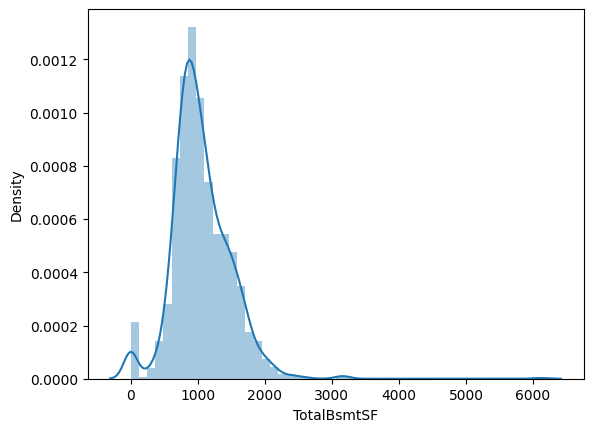

In [15]:
sns.distplot(train_df['TotalBsmtSF']);
#skewness and kurtosis
print("Skewness: %f" % train_df['TotalBsmtSF'].skew())
print("Kurtosis: %f" % train_df['TotalBsmtSF'].kurt())

In [16]:
for df in [train_df, test_df]:

    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df['TotalBsmtSF_Log'] = np.log(df['TotalBsmtSF'])
    df['1stFlrSF_Log'] = np.log(df['1stFlrSF'])
    df['TotalSF_Log'] = np.log(df['TotalSF'])
    df['Total_SF_Log'] = np.log(df['Total_SF'])

train_df['SalePrice_log'] = np.log(train_df['SalePrice'])
train_df = train_df.drop(['GrLivArea','TotalBsmtSF','1stFlrSF','TotalSF','Total_SF'],axis=1)
test_df = test_df.drop(['GrLivArea','TotalBsmtSF','1stFlrSF','TotalSF','Total_SF'],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### 2.2 Non numerical features

#### 2.2.1  Feature Selection

In [17]:
housing_data = pd.notna(train_df[cate_var])
bad_features = []
for col in housing_data.columns:
    if housing_data[col].mean() < 0.9:
        bad_features.append(col)
print("There are %d features has more than 90%% N/A values." % len(bad_features),bad_features)

There are 5 features has more than 90% N/A values. ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [18]:
train_df[cate_var]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


As we have 43 category variables in the dataset, we will drop the 5 features.
After checking the names of category variables, we will replace N/A with None in the basement/garage related varaibles.
For Other Category variables, we will use the mode of each column to raplace N/A in each columns.

In [19]:
cat_var_df = train_df[cate_var].drop(columns=bad_features)
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
cat_var_df[columns_None]= cat_var_df[columns_None].fillna('None')
for col in cat_var_df.columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


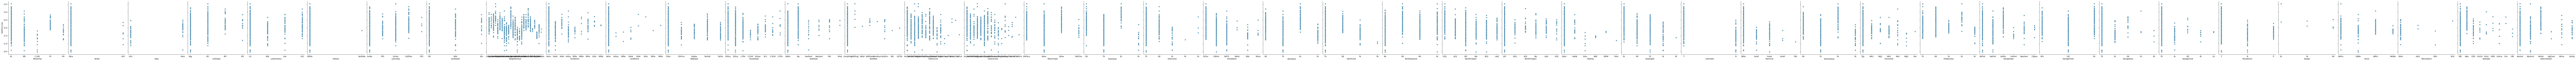

In [21]:
pp = sns.pairplot(data= train_df,
                  y_vars=['SalePrice_log'],
                  x_vars=cate_var,size = 5)

Based on the plot, we can see that ['MiscFeature','PoolQC','Condition2','Utilities','Street'] has too little variance, so we will drop them.

#### 2.2.2 Covert Category Variable to Dummy Vairables

In [25]:
train_df_dummy = pd.get_dummies(train_df.drop(['MiscFeature','PoolQC','Condition2','Utilities','Street'],axis=1))


### 3. Linear Regression Application

In [89]:
x_final = train_df_dummy.drop(columns=['SalePrice','SalePrice_log'])
y_final = train_df['SalePrice_log']
x_final = x_final.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 273), (292, 273), (1168,), (292,))

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred = regressor_lr.predict(x_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8457775894347519

Text(0, 0.5, 'y_pred')

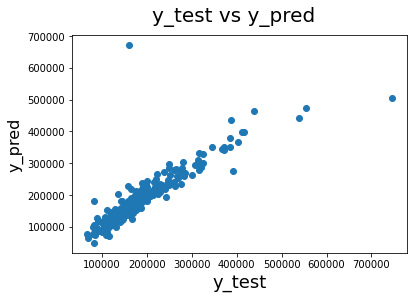

In [92]:
pred = np.exp(regressor_lr.predict(x_test))
fig = plt.figure()
plt.scatter(np.exp(y_test),pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

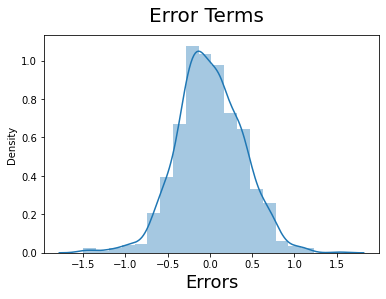

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

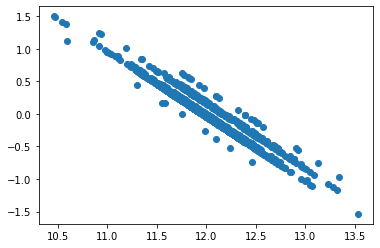

In [94]:
plt.scatter(y_train,res)
plt.show()

### 4. Linear Regression Application

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

Text(0, 0.5, 'y_pred')

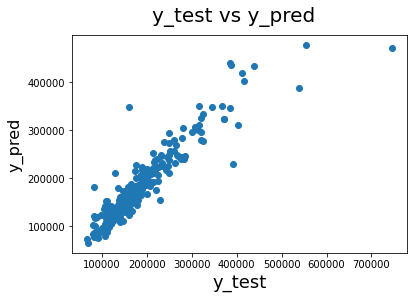

In [96]:
pred = np.exp(rf.predict(x_test))
fig = plt.figure()
plt.scatter(np.exp(y_test),pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

In [97]:
y_pred = rf.predict(x_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8704369245566809

### 5.  Comparison of Linear Regression and Random Foreset Regression

In [106]:
from sklearn import metrics
mae_linear = metrics.mean_absolute_error(np.exp(y_test), np.exp(lr.predict(x_test)))
mae_RF = metrics.mean_absolute_error(np.exp(y_test), np.exp(rf.predict(x_test)))
mse_linear = metrics.mean_squared_error(np.exp(y_test), np.exp(lr.predict(x_test)))
mse_RF = metrics.mean_squared_error(np.exp(y_test), np.exp(rf.predict(x_test)))
r2_square_linear = metrics.r2_score(np.exp(y_test), np.exp(lr.predict(x_test)))
r2_square_RF =metrics.r2_score(np.exp(y_test), np.exp(rf.predict(x_test)))

print("Value    ",'   ',"Linear    ",'      ',"Random Forest    ")
print("MAE      ",'   ','{:.2f}'.format(mae_linear),'        ', "{:.2f}".format(mae_RF ))
print("MSE      ",'   ','{:.2f}'.format(mse_linear),'   ', "{:.2f}".format(mse_RF ))
print("R2_Square",'   ','{:.2f}'.format(r2_square_linear),'            ', "{:.2f}".format(r2_square_RF ))


Value         Linear            Random Forest    
MAE           17545.44          17484.87
MSE           1561726063.80     996471962.89
R2_Square     0.77              0.86


### Conclusion

We can see from the error comparsion, Random Forest Model preforms the better on Hoursing Price Perdiction.